In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
df = pd.read_csv('data/btc_data.csv', index_col=0)
df['signal'] = df['signal'].astype('int')

df

,Time,Price,RSI,MovingAverage10,EMA10,MovingAverage21,EMA21,MovingAverage50,EMA50,LowerBB,...,MACD1,MACD2,MACD3,Momentum12,RoC12,Momentum14,RoC14,Momentum21,RoC21,signal
0,"""2010-07-18""",0.085840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,"""2010-07-19""",0.080800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,"""2010-07-20""",0.074736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,"""2010-07-21""",0.079193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,"""2010-07-22""",0.058470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,"""2022-03-02""",43984.584927,49.794767,39843.611390,41185.309688,40919.160318,40787.168232,40405.481374,41670.678659,35704.369615,...,217.692932,-306.867403,524.560335,1.098400,0.098400,0.998159,-0.001841,0.990531,-0.009469,0
4246,"""2022-03-03""",42492.774455,55.288607,40383.085235,41423.030555,40865.752306,40942.223343,40376.116332,41702.917710,35701.959914,...,319.005882,-181.692746,500.698627,1.059779,0.059779,1.046362,0.046362,0.974284,-0.025716,0
4247,"""2022-03-04""",39106.405216,47.726026,40473.466348,41001.825948,40710.946757,40775.330786,40305.707128,41601.093691,35539.155502,...,124.609012,-120.432394,245.041407,1.014391,0.014391,0.976581,-0.023419,0.923250,-0.076750,0
4248,"""2022-03-05""",39383.884843,48.292268,40681.027959,40707.654838,40578.109874,40648.835700,40231.331873,41514.144324,35424.433647,...,-6.981146,-97.742145,90.760999,1.061616,0.061616,0.982243,-0.017757,0.933855,-0.066145,0


In [14]:
## Change format of Time so I can filter later
for i in range(df.shape[0]):
    df['Time'][i] = df['Time'][i].split('"')[1]
df

C:\Users\kanat\AppData\Local\Temp\ipykernel_17684\3727563804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'][i] = df['Time'][i].split('"')[1]


,Time,Price,RSI,MovingAverage10,EMA10,MovingAverage21,EMA21,MovingAverage50,EMA50,LowerBB,...,MACD1,MACD2,MACD3,Momentum12,RoC12,Momentum14,RoC14,Momentum21,RoC21,signal
0,2010-07-18,0.085840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,2010-07-19,0.080800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,2010-07-20,0.074736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,2010-07-21,0.079193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,2010-07-22,0.058470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,2022-03-02,43984.584927,49.794767,39843.611390,41185.309688,40919.160318,40787.168232,40405.481374,41670.678659,35704.369615,...,217.692932,-306.867403,524.560335,1.098400,0.098400,0.998159,-0.001841,0.990531,-0.009469,0
4246,2022-03-03,42492.774455,55.288607,40383.085235,41423.030555,40865.752306,40942.223343,40376.116332,41702.917710,35701.959914,...,319.005882,-181.692746,500.698627,1.059779,0.059779,1.046362,0.046362,0.974284,-0.025716,0
4247,2022-03-04,39106.405216,47.726026,40473.466348,41001.825948,40710.946757,40775.330786,40305.707128,41601.093691,35539.155502,...,124.609012,-120.432394,245.041407,1.014391,0.014391,0.976581,-0.023419,0.923250,-0.076750,0
4248,2022-03-05,39383.884843,48.292268,40681.027959,40707.654838,40578.109874,40648.835700,40231.331873,41514.144324,35424.433647,...,-6.981146,-97.742145,90.760999,1.061616,0.061616,0.982243,-0.017757,0.933855,-0.066145,0


In [15]:
df['Time'] = pd.to_datetime(df['Time'],format='%Y-%m-%d')
df = df[df['Time'] >= pd.Timestamp(2010, 1, 1)]
df = df[df['Time'] <= pd.Timestamp(2021, 12, 31)]


df

,Time,Price,RSI,MovingAverage10,EMA10,MovingAverage21,EMA21,MovingAverage50,EMA50,LowerBB,...,MACD1,MACD2,MACD3,Momentum12,RoC12,Momentum14,RoC14,Momentum21,RoC21,signal
0,2010-07-18,0.085840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,2010-07-19,0.080800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,2010-07-20,0.074736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,2010-07-21,0.079193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,2010-07-22,0.058470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,2021-12-27,50796.377674,69.602868,49219.216563,49804.785557,48857.489121,50127.943013,54580.594563,52486.513401,45566.701358,...,-880.995914,-1641.515545,760.519631,1.040257,0.040257,1.085733,0.085733,1.005164,0.005164,0
4181,2021-12-28,47673.044045,47.384776,49296.033600,49417.196192,48719.325846,49904.770380,54183.220334,52297.749897,45497.817908,...,-979.236993,-1509.059835,529.822842,1.000201,0.000201,0.987169,-0.012831,0.942631,-0.057369,0
4182,2021-12-29,46470.321575,40.567501,49255.423065,48881.400807,48527.405237,49592.547761,53770.715052,52069.223296,45290.272181,...,-1140.990776,-1435.446023,294.455247,1.002932,0.002932,0.951664,-0.048336,0.920192,-0.079808,0
4183,2021-12-30,47102.463004,47.657892,49270.193018,48557.957570,48487.626197,49366.176420,53417.642753,51874.448382,45246.062154,...,-1204.290967,-1389.215012,184.924045,1.004213,0.004213,0.988230,-0.011770,0.982574,-0.017426,0


In [17]:
df1 = df
df1['Time'] = pd.to_datetime(df1['Time'],format='%Y-%m-%d')
df1 = df1[df1['Time'] >= pd.Timestamp(2011, 1, 1)]
df1 = df1[df1['Time'] <= pd.Timestamp(2021, 12, 31)]
df1

,Time,Price,RSI,MovingAverage10,EMA10,MovingAverage21,EMA21,MovingAverage50,EMA50,LowerBB,...,MACD1,MACD2,MACD3,Momentum12,RoC12,Momentum14,RoC14,Momentum21,RoC21,signal
167,2011-01-01,0.300000,75.369476,0.275862,0.280994,0.258329,0.265562,0.253609,0.243577,0.213209,...,0.015787,0.010072,0.005715,1.123596,0.123596,1.244813,0.244813,1.315789,0.315789,1
168,2011-01-02,0.299970,75.937629,0.280862,0.284444,0.262145,0.268690,0.254089,0.245788,0.216271,...,0.016438,0.011345,0.005092,1.242441,0.242441,1.249354,0.249354,1.364408,0.364408,1
169,2011-01-03,0.295000,64.976230,0.285562,0.286363,0.265354,0.271082,0.254408,0.247718,0.217471,...,0.016364,0.012349,0.004015,1.180000,0.180000,1.104869,0.104869,1.296104,0.296104,1
170,2011-01-04,0.298950,90.013927,0.290467,0.288652,0.267842,0.273616,0.255018,0.249727,0.219984,...,0.016434,0.013166,0.003268,1.195943,0.195943,1.238216,0.238216,1.211845,0.211845,1
171,2011-01-05,0.298916,88.615791,0.293862,0.290518,0.270648,0.275916,0.256496,0.251656,0.221606,...,0.016300,0.013793,0.002507,1.205308,0.205308,1.195665,0.195665,1.245485,0.245485,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,2021-12-27,50796.377674,69.602868,49219.216563,49804.785557,48857.489121,50127.943013,54580.594563,52486.513401,45566.701358,...,-880.995914,-1641.515545,760.519631,1.040257,0.040257,1.085733,0.085733,1.005164,0.005164,0
4181,2021-12-28,47673.044045,47.384776,49296.033600,49417.196192,48719.325846,49904.770380,54183.220334,52297.749897,45497.817908,...,-979.236993,-1509.059835,529.822842,1.000201,0.000201,0.987169,-0.012831,0.942631,-0.057369,0
4182,2021-12-29,46470.321575,40.567501,49255.423065,48881.400807,48527.405237,49592.547761,53770.715052,52069.223296,45290.272181,...,-1140.990776,-1435.446023,294.455247,1.002932,0.002932,0.951664,-0.048336,0.920192,-0.079808,0
4183,2021-12-30,47102.463004,47.657892,49270.193018,48557.957570,48487.626197,49366.176420,53417.642753,51874.448382,45246.062154,...,-1204.290967,-1389.215012,184.924045,1.004213,0.004213,0.988230,-0.011770,0.982574,-0.017426,0


## Scaling data: Normalization + Standardization

In [5]:
## Check minimum

# for column in df.columns:
#     print('Minimum value of column {} is {}.'.format(column, min(df[column])))

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

df1 = df[:len(df)-7]

scaler1 = MinMaxScaler(feature_range=(-1,1))
scaler2 = MinMaxScaler(feature_range=(0,1))
standard_scaler = StandardScaler() 

y_data = df1['signal']
x_data = df1.drop(['Time','signal'], axis=1)

for column in x_data.columns:
    if min(x_data[column]) >= 0:
        x_data[column] = scaler2.fit_transform(np.array(x_data[column]).reshape(-1,1))
        x_data[column] = standard_scaler.fit_transform(np.array(x_data[column]).reshape(-1,1))
    else:
        x_data[column] = scaler1.fit_transform(np.array(x_data[column]).reshape(-1,1))
        x_data[column] = standard_scaler.fit_transform(np.array(x_data[column]).reshape(-1,1))


# y_data
# x_data

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, shuffle=False)


In [7]:
## Check if mean is close to 0 and std is close to 1

# x_data.mean(axis=0)
# x_data.std(axis=0)
x_data.shape

(4243, 20)

## Building NN models with 1 to 100 neurons

In [8]:
from sklearn.neural_network import MLPClassifier

In [9]:
neurons = [i for i in range(1,101)]
# num_neurons

## Training with all the data

In [202]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)


train_accuracies1 = []
test_accuracies1 = []

for num_neurons in neurons:
    clf = MLPClassifier(hidden_layer_sizes=(num_neurons),max_iter = 300)
    clf.fit(x_train, y_train)

    train_accuracies1.append(clf.score(x_train, y_train))
    test_accuracies1.append(clf.score(x_test, y_test))



## Training with filtered data (2019-01-01 ~ present)

In [7]:
df
df['Time'] = pd.to_datetime(df['Time'],format='%Y-%m-%d')
df = df[df['Time'] >= pd.Timestamp(2011, 1, 1)]
df = df[df['Time'] <= pd.Timestamp(2021, 12, 31)]


df
# df1.to_csv('mid.csv')  

,Time,Price,RSI,MovingAverage10,EMA10,MovingAverage21,EMA21,MovingAverage50,EMA50,LowerBB,...,MACD1,MACD2,MACD3,Momentum12,RoC12,Momentum14,RoC14,Momentum21,RoC21,signal
167,2011-01-01,0.300000,75.369476,0.275862,0.280994,0.258329,0.265562,0.253609,0.243577,0.213209,...,0.015787,0.010072,0.005715,1.123596,0.123596,1.244813,0.244813,1.315789,0.315789,1
168,2011-01-02,0.299970,75.937629,0.280862,0.284444,0.262145,0.268690,0.254089,0.245788,0.216271,...,0.016438,0.011345,0.005092,1.242441,0.242441,1.249354,0.249354,1.364408,0.364408,1
169,2011-01-03,0.295000,64.976230,0.285562,0.286363,0.265354,0.271082,0.254408,0.247718,0.217471,...,0.016364,0.012349,0.004015,1.180000,0.180000,1.104869,0.104869,1.296104,0.296104,1
170,2011-01-04,0.298950,90.013927,0.290467,0.288652,0.267842,0.273616,0.255018,0.249727,0.219984,...,0.016434,0.013166,0.003268,1.195943,0.195943,1.238216,0.238216,1.211845,0.211845,1
171,2011-01-05,0.298916,88.615791,0.293862,0.290518,0.270648,0.275916,0.256496,0.251656,0.221606,...,0.016300,0.013793,0.002507,1.205308,0.205308,1.195665,0.195665,1.245485,0.245485,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,2021-12-27,50796.377674,69.602868,49219.216563,49804.785557,48857.489121,50127.943013,54580.594563,52486.513401,45566.701358,...,-880.995914,-1641.515545,760.519631,1.040257,0.040257,1.085733,0.085733,1.005164,0.005164,0
4181,2021-12-28,47673.044045,47.384776,49296.033600,49417.196192,48719.325846,49904.770380,54183.220334,52297.749897,45497.817908,...,-979.236993,-1509.059835,529.822842,1.000201,0.000201,0.987169,-0.012831,0.942631,-0.057369,0
4182,2021-12-29,46470.321575,40.567501,49255.423065,48881.400807,48527.405237,49592.547761,53770.715052,52069.223296,45290.272181,...,-1140.990776,-1435.446023,294.455247,1.002932,0.002932,0.951664,-0.048336,0.920192,-0.079808,0
4183,2021-12-30,47102.463004,47.657892,49270.193018,48557.957570,48487.626197,49366.176420,53417.642753,51874.448382,45246.062154,...,-1204.290967,-1389.215012,184.924045,1.004213,0.004213,0.988230,-0.011770,0.982574,-0.017426,0


In [204]:
scaler1 = MinMaxScaler(feature_range=(-1,1))
scaler2 = MinMaxScaler(feature_range=(0,1))
standard_scaler = StandardScaler() 

y_data_fil = df1['signal']
x_data_fil = df1.drop(['Time','signal'], axis=1)

for column in x_data_fil.columns:
    if min(x_data_fil[column]) >= 0:
        x_data_fil[column] = scaler2.fit_transform(np.array(x_data_fil[column]).reshape(-1,1))
        x_data_fil[column] = standard_scaler.fit_transform(np.array(x_data_fil[column]).reshape(-1,1))
    else:
        x_data_fil[column] = scaler1.fit_transform(np.array(x_data_fil[column]).reshape(-1,1))
        x_data_fil[column] = standard_scaler.fit_transform(np.array(x_data_fil[column]).reshape(-1,1))

# y_data
# x_data

x_train_fil, x_test_fil, y_train_fil, y_test_fil = train_test_split(x_data_fil, y_data_fil, test_size=0.20, shuffle=False)


In [235]:
## Check if mean is close to 0 and std is close to 1

# x_data.mean(axis=0)
# x_data.std(axis=0)
x_data_fil.shape

(1154, 20)

In [206]:
train_accuracies2 = []
test_accuracies2 = []

for num_neurons in neurons:
    clf = MLPClassifier(hidden_layer_sizes=(num_neurons),max_iter = 300)
    clf.fit(x_train_fil, y_train_fil)

    train_accuracies2.append(clf.score(x_train_fil, y_train_fil))
    test_accuracies2.append(clf.score(x_test_fil, y_test_fil))


## Plot (All data & Filtered data, shuflle = False)|

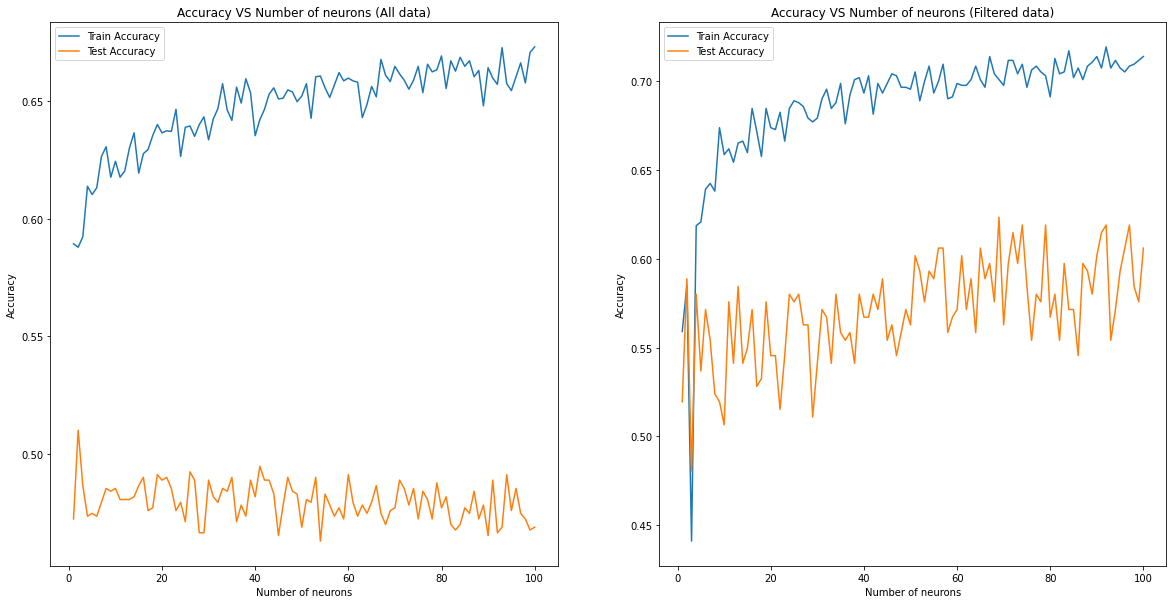

In [207]:
## Plot the result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.plot(neurons, train_accuracies1, label="Train Accuracy")
ax1.plot(neurons, test_accuracies1, label="Test Accuracy")
ax1.legend(loc='best')
ax1.set_xlabel('Number of neurons')
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy VS Number of neurons (All data)")

ax2.plot(neurons, train_accuracies2, label="Train Accuracy")
ax2.plot(neurons, test_accuracies2, label="Test Accuracy")
ax2.legend(loc='best')
ax2.set_xlabel("Number of neurons")
ax2.set_ylabel("Accuracy")
ax2.set_title("Accuracy VS Number of neurons (Filtered data)")

plt.show()

## Shuffling True

In [208]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20)

train_accuracies8 = []
test_accuracies8 = []

for num_neurons in neurons:
    clf = MLPClassifier(hidden_layer_sizes=(num_neurons),max_iter = 300)
    clf.fit(x_train_fil, y_train_fil)

    train_accuracies8.append(clf.score(x_train_fil, y_train_fil))
    test_accuracies8.append(clf.score(x_test_fil, y_test_fil))

In [209]:
x_train_fil, x_test_fil, y_train_fil, y_test_fil = train_test_split(x_data_fil, y_data_fil, test_size=0.20)

train_accuracies7 = []
test_accuracies7 = []

for num_neurons in neurons:
    clf = MLPClassifier(hidden_layer_sizes=(num_neurons),max_iter = 300)
    clf.fit(x_train_fil, y_train_fil)

    train_accuracies7.append(clf.score(x_train_fil, y_train_fil))
    test_accuracies7.append(clf.score(x_test_fil, y_test_fil))

## Plot (All data & Filtered data, shuflle = True)

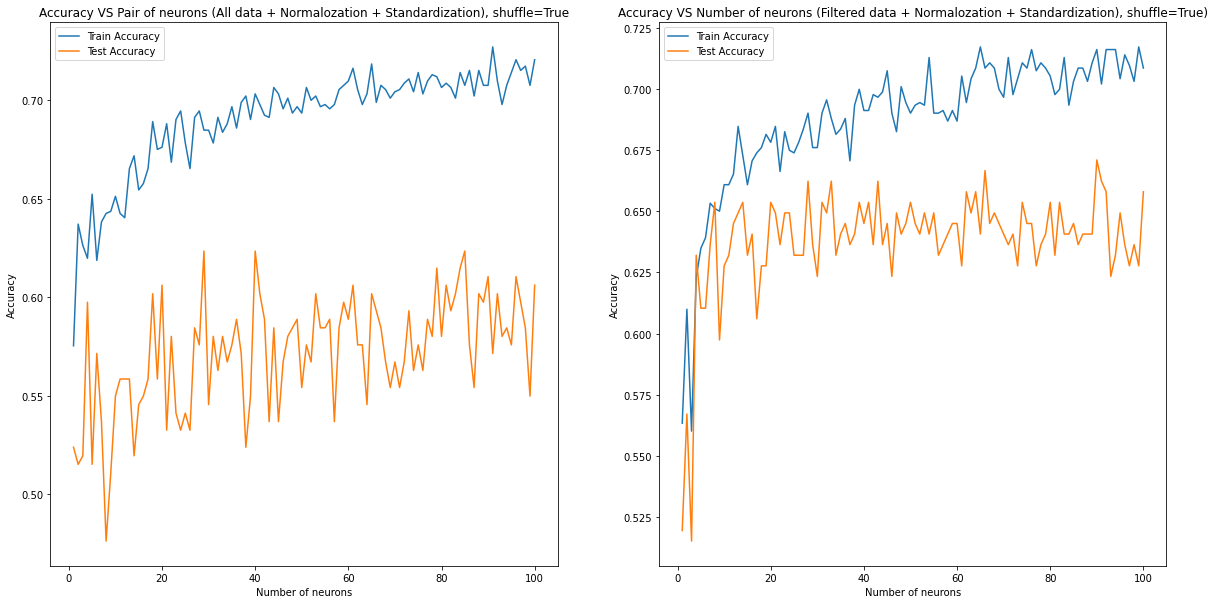

In [210]:
## Plot the result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.plot(neurons, train_accuracies8, label="Train Accuracy")
ax1.plot(neurons, test_accuracies8, label="Test Accuracy")
ax1.legend(loc='best')
ax1.set_xlabel('Number of neurons')
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy VS Pair of neurons (All data + Normalozation + Standardization), shuffle=True")

ax2.plot(neurons, train_accuracies7, label="Train Accuracy")
ax2.plot(neurons, test_accuracies7, label="Test Accuracy")
ax2.legend(loc='best')
ax2.set_xlabel("Number of neurons")
ax2.set_ylabel("Accuracy")
ax2.set_title("Accuracy VS Number of neurons (Filtered data + Normalozation + Standardization), shuffle=True)")

plt.show()

## Normalization VS Standardazation

In [211]:
## Only normalization applied
## If column contains negative values -> normalize in range of (-1,1)
## Otherwise, normaliza in range of (0,1)

scaler1 = MinMaxScaler(feature_range=(-1,1))
scaler2 = MinMaxScaler(feature_range=(0,1))
standard_scaler = StandardScaler() 

y_data_n = df1['signal']
x_data_n = df1.drop(['Time','signal'], axis=1)

for column in x_data_n.columns:
    if min(x_data_n[column]) >= 0:
        x_data_n[column] = scaler2.fit_transform(np.array(x_data_n[column]).reshape(-1,1))
        # x_data[column] = standard_scaler.fit_transform(np.array(x_data[column]).reshape(-1,1))
    else:
        x_data_n[column] = scaler1.fit_transform(np.array(x_data_n[column]).reshape(-1,1))
        # x_data[column] = standard_scaler.fit_transform(np.array(x_data[column]).reshape(-1,1))


# y_data
# x_data

x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(x_data_n, y_data_n, test_size=0.20)

In [212]:
train_accuracies3 = []
test_accuracies3 = []

for num_neurons in neurons:
    clf = MLPClassifier(hidden_layer_sizes=(num_neurons),max_iter = 300)
    clf.fit(x_train_n, y_train_n)

    train_accuracies3.append(clf.score(x_train_n, y_train_n))
    test_accuracies3.append(clf.score(x_test_n, y_test_n))

In [213]:
## Only standardization applied

# scaler1 = MinMaxScaler(feature_range=(-1,1))
# scaler2 = MinMaxScaler(feature_range=(0,1))

standard_scaler = StandardScaler() 

y_data_s = df1['signal']
x_data_s = df1.drop(['Time','signal'], axis=1)

for column in x_data_s.columns:
    if min(x_data_s[column]) >= 0:
        # x_data_n[column] = scaler2.fit_transform(np.array(x_data_n[column]).reshape(-1,1))
        x_data_s[column] = standard_scaler.fit_transform(np.array(x_data_s[column]).reshape(-1,1))
    else:
        # x_data_n[column] = scaler1.fit_transform(np.array(x_data_n[column]).reshape(-1,1))
        x_data_s[column] = standard_scaler.fit_transform(np.array(x_data_s[column]).reshape(-1,1))


# y_data
# x_data

x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_data_s, y_data_s, test_size=0.20)

In [214]:
train_accuracies4 = []
test_accuracies4 = []

for num_neurons in neurons:
    clf = MLPClassifier(hidden_layer_sizes=(num_neurons),max_iter = 300)
    clf.fit(x_train_s, y_train_s)

    train_accuracies4.append(clf.score(x_train_s, y_train_s))
    test_accuracies4.append(clf.score(x_test_s, y_test_s))

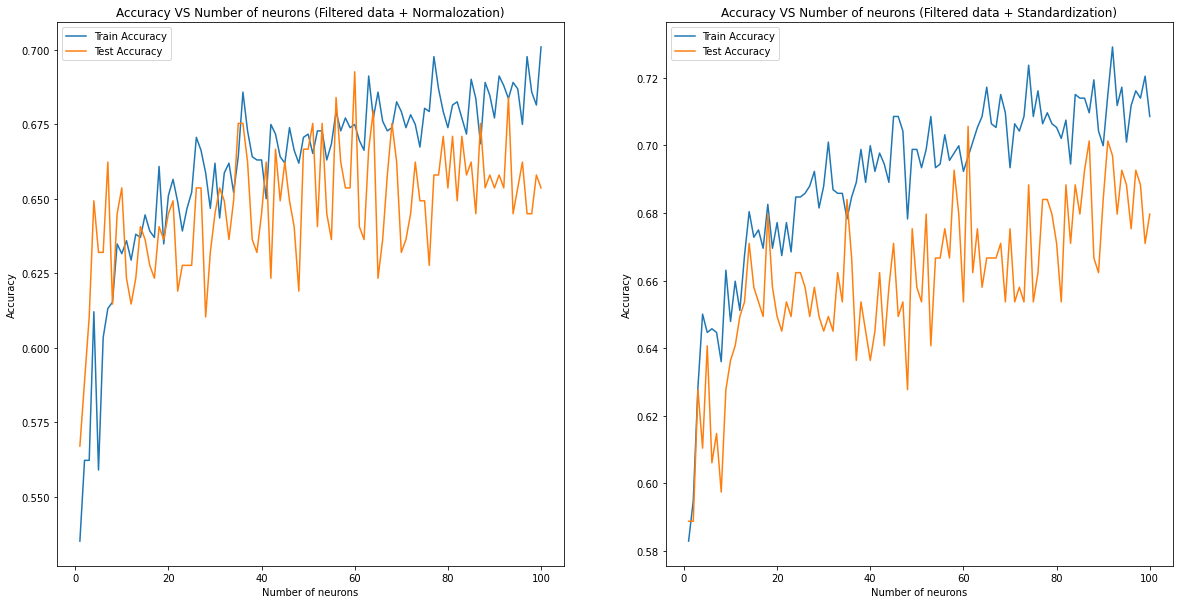

In [215]:
## Plot the result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.plot(neurons, train_accuracies3, label="Train Accuracy")
ax1.plot(neurons, test_accuracies3, label="Test Accuracy")
ax1.legend(loc='best')
ax1.set_xlabel('Number of neurons')
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy VS Number of neurons (Filtered data + Normalozation)")

ax2.plot(neurons, train_accuracies4, label="Train Accuracy")
ax2.plot(neurons, test_accuracies4, label="Test Accuracy")
ax2.legend(loc='best')
ax2.set_xlabel("Number of neurons")
ax2.set_ylabel("Accuracy")
ax2.set_title("Accuracy VS Number of neurons (Filtered data + Standardization)")

plt.show()

## Multilayer NN models (1,1) ~ (30,30)

In [216]:
neurons_l1 = [i for i in range(1,31)]
neurons_l2 = [i for i in range(1,31)]

In [217]:
train_accuracies5 = []
test_accuracies5 = []

layer = []
for num_neurons_l1 in neurons_l1:
    for num_neurons_l2 in neurons_l2:
        layer.append((num_neurons_l1, num_neurons_l2))

        clf = MLPClassifier(hidden_layer_sizes=(num_neurons_l1,num_neurons_l2),max_iter = 300)
        clf.fit(x_train_fil, y_train_fil)

        train_accuracies5.append(clf.score(x_train_fil, y_train_fil))
        test_accuracies5.append(clf.score(x_test_fil, y_test_fil))

In [218]:
for i, pair in enumerate(layer):
    pair = str(pair)
    layer[i] = pair

Text(0.5, 1.0, 'Accuracy VS Pair of neurons (Filtered data + Normalozation + Standardization)')

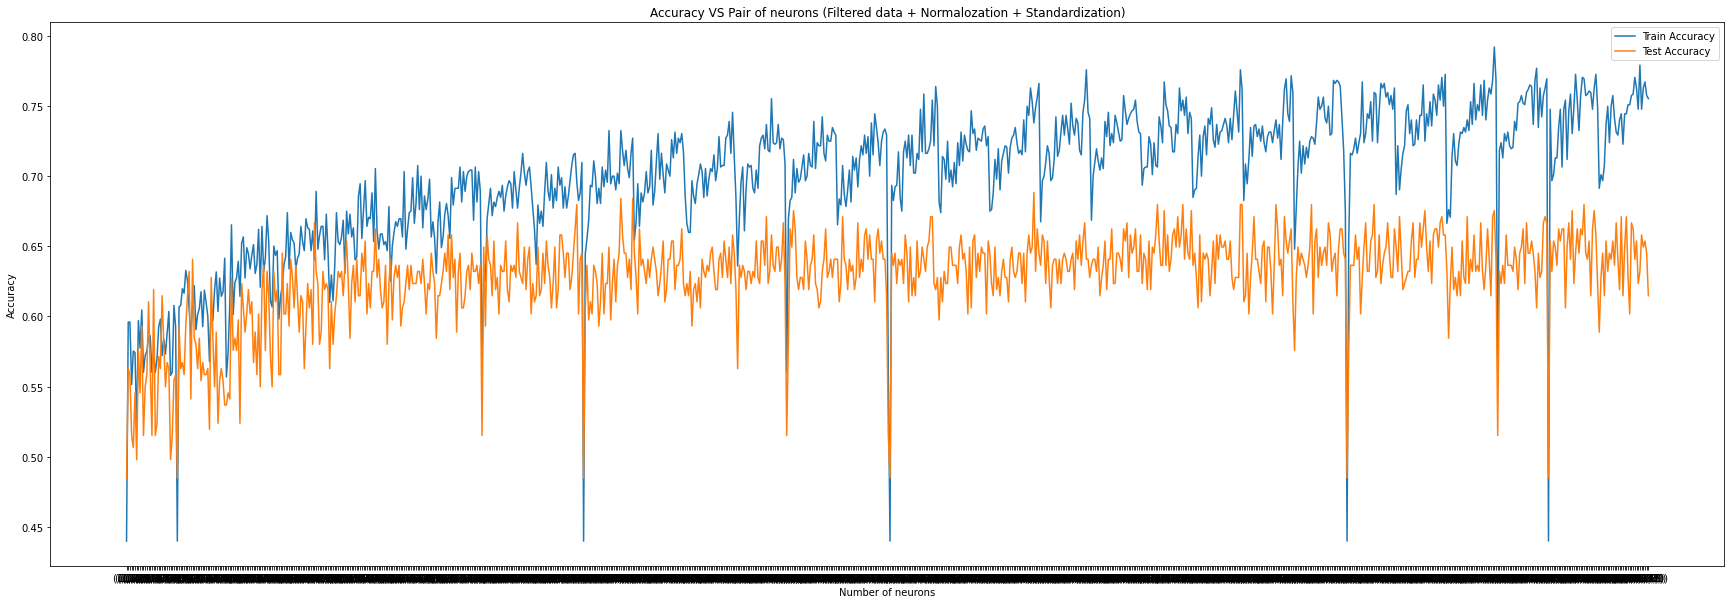

In [219]:
## x-axis shows pair of neurons ((10,15) means the first layer with 10 neurons and the second layer with 15)
## I tested out (1,1) to (30,30) so 900 total pairs

plt.figure(figsize=(30, 10))
plt.plot(layer, train_accuracies5, label="Train Accuracy")
plt.plot(layer, test_accuracies5, label="Test Accuracy")
plt.legend(loc='best')
plt.xlabel('Number of neurons')
plt.ylabel("Accuracy")
plt.title("Accuracy VS Pair of neurons (Filtered data + Normalozation + Standardization)")

## Multilayer NN with learning_rate='adaptive'

In [220]:
train_accuracies6 = []
test_accuracies6 = []

layer2 = []
for num_neurons_l1 in neurons_l1:
    for num_neurons_l2 in neurons_l2:
        layer2.append((num_neurons_l1, num_neurons_l2))

        clf = MLPClassifier(hidden_layer_sizes=(num_neurons_l1,num_neurons_l2),max_iter = 300, learning_rate='adaptive')
        clf.fit(x_train_fil, y_train_fil)

        train_accuracies6.append(clf.score(x_train_fil, y_train_fil))
        test_accuracies6.append(clf.score(x_test_fil, y_test_fil))

In [221]:
for i, pair in enumerate(layer2):
    pair = str(pair)
    layer2[i] = pair

Text(0.5, 1.0, "Accuracy VS Pair of neurons (Filtered data + Normalozation + Standardization, learning_rate = 'adaptive')")

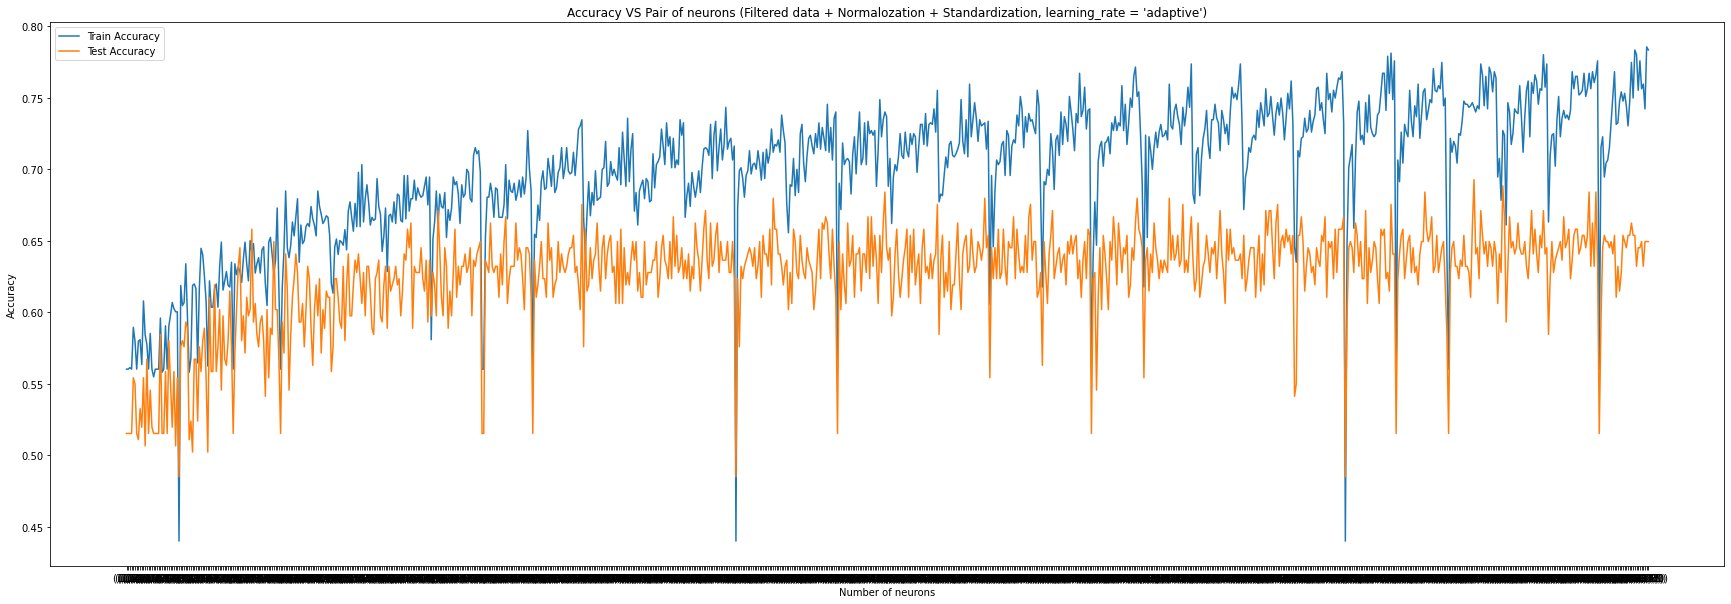

In [222]:
## x-axis shows pair of neurons ((10,15) means the first layer with 10 neurons and the second layer with 15)
## I tested out (1,1) to (30,30) so 900 total pairs
## Changed learning_rate to 'adaptive'.

plt.figure(figsize=(30, 10))
plt.plot(layer, train_accuracies6, label="Train Accuracy")
plt.plot(layer, test_accuracies6, label="Test Accuracy")
plt.legend(loc='best')
plt.xlabel('Number of neurons')
plt.ylabel("Accuracy")
plt.title("Accuracy VS Pair of neurons (Filtered data + Normalozation + Standardization, learning_rate = 'adaptive')")

## Try intervals = 2 weeks (14 days) & 1 month (30days)

In [223]:
## load data with 2 weeks interval
df_2w = pd.read_csv('data/btc_2w.csv', index_col=0)
df_2w['signals_2w'] = df_2w['signals_2w'].astype('int')

for i in range(df_2w.shape[0]):
    df_2w['Time'][i] = df_2w['Time'][i].split('"')[1]

## load data with 1 month (30days) interval
df_30d = pd.read_csv('data/btc_30d.csv', index_col=0)
df_30d['signals_30d'] = df_30d['signals_30d'].astype('int')

for i in range(df_30d.shape[0]):
    df_30d['Time'][i] = df_30d['Time'][i].split('"')[1]

C:\Users\kanat\AppData\Local\Temp\ipykernel_10248\4220405981.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2w['Time'][i] = df_2w['Time'][i].split('"')[1]
C:\Users\kanat\AppData\Local\Temp\ipykernel_10248\4220405981.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_30d['Time'][i] = df_30d['Time'][i].split('"')[1]


In [224]:
## Adjust length of data based on interval
df_2w1 = df_2w[:len(df_2w)-14]
df_2w1['Time'] = pd.to_datetime(df_2w1['Time'],format='%Y-%m-%d')
df_2w1 = df_2w1[df_2w1['Time'] >= pd.Timestamp(2019, 1, 1)]

df_30d1 = df_30d[:len(df_30d)-30]
df_30d1['Time'] = pd.to_datetime(df_30d1['Time'],format='%Y-%m-%d')
df_30d1 = df_30d1[df_30d1['Time'] >= pd.Timestamp(2019, 1, 1)]

C:\Users\kanat\AppData\Local\Temp\ipykernel_10248\882976455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2w1['Time'] = pd.to_datetime(df_2w1['Time'],format='%Y-%m-%d')
C:\Users\kanat\AppData\Local\Temp\ipykernel_10248\882976455.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_30d1['Time'] = pd.to_datetime(df_30d1['Time'],format='%Y-%m-%d')


In [225]:
# df_30d1

In [226]:
scaler1 = MinMaxScaler(feature_range=(-1,1))
scaler2 = MinMaxScaler(feature_range=(0,1))
standard_scaler = StandardScaler() 

## Normalize & Standardize 2week data
y_data_2w = df_2w1['signals_2w']
x_data_2w = df_2w1.drop(['Time','signals_2w'], axis=1)

for column in x_data_2w.columns:
    if min(x_data_2w[column]) >= 0:
        x_data_2w[column] = scaler2.fit_transform(np.array(x_data_2w[column]).reshape(-1,1))
        x_data_2w[column] = standard_scaler.fit_transform(np.array(x_data_2w[column]).reshape(-1,1))
    else:
        x_data_2w[column] = scaler1.fit_transform(np.array(x_data_2w[column]).reshape(-1,1))
        x_data_2w[column] = standard_scaler.fit_transform(np.array(x_data_2w[column]).reshape(-1,1))

## Normalize & Standardize 1month data
y_data_30d = df_30d1['signals_30d']
x_data_30d = df_30d1.drop(['Time','signals_30d'], axis=1)

for column in x_data_30d.columns:
    if min(x_data_30d[column]) >= 0:
        x_data_30d[column] = scaler2.fit_transform(np.array(x_data_30d[column]).reshape(-1,1))
        x_data_30d[column] = standard_scaler.fit_transform(np.array(x_data_30d[column]).reshape(-1,1))
    else:
        x_data_30d[column] = scaler1.fit_transform(np.array(x_data_30d[column]).reshape(-1,1))
        x_data_30d[column] = standard_scaler.fit_transform(np.array(x_data_30d[column]).reshape(-1,1))

In [227]:
neurons = [i for i in range(1,101)]

In [228]:
x_train_2w, x_test_2w, y_train_2w, y_test_2w = train_test_split(x_data_2w, y_data_2w, test_size=0.20)

train_accuracies9 = []
test_accuracies9 = []

for num_neurons in neurons:
    clf = MLPClassifier(hidden_layer_sizes=(num_neurons),max_iter = 300)
    clf.fit(x_train_2w, y_train_2w)

    train_accuracies9.append(clf.score(x_train_2w, y_train_2w))
    test_accuracies9.append(clf.score(x_test_2w, y_test_2w))

In [231]:
x_train_30d, x_test_30d, y_train_30d, y_test_30d = train_test_split(x_data_30d, y_data_30d, test_size=0.20)

train_accuracies10 = []
test_accuracies10 = []

for num_neurons in neurons:
    clf = MLPClassifier(hidden_layer_sizes=(num_neurons),max_iter = 300)
    clf.fit(x_train_30d, y_train_30d)

    train_accuracies10.append(clf.score(x_train_30d, y_train_30d))
    test_accuracies10.append(clf.score(x_test_30d, y_test_30d))

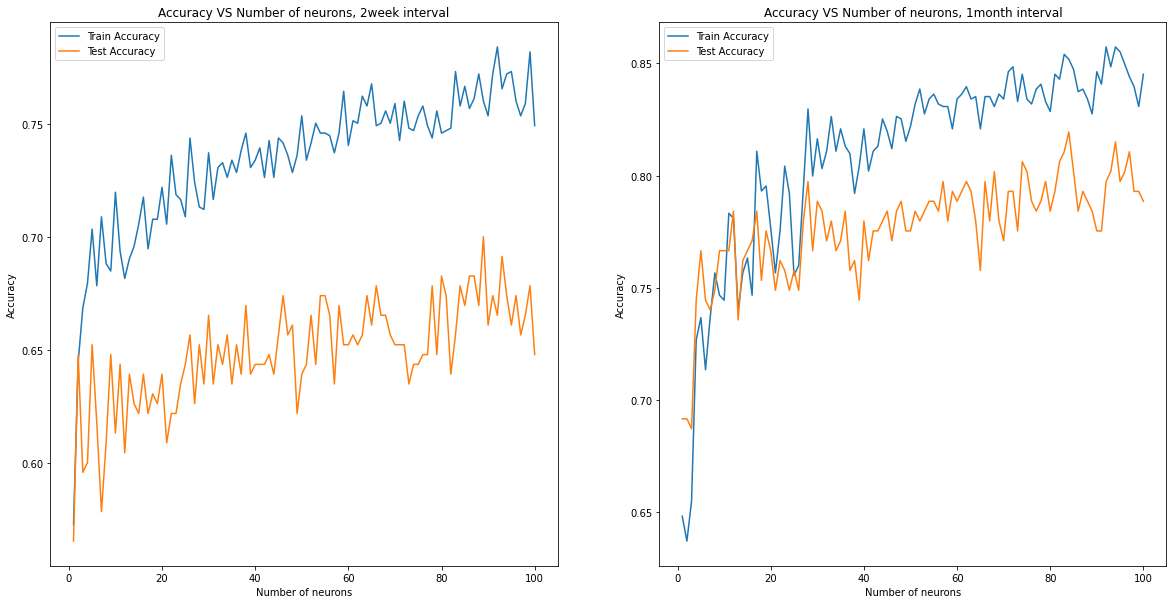

In [232]:
## Plot the result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.plot(neurons, train_accuracies9, label="Train Accuracy")
ax1.plot(neurons, test_accuracies9, label="Test Accuracy")
ax1.legend(loc='best')
ax1.set_xlabel('Number of neurons')
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy VS Number of neurons, 2week interval")

ax2.plot(neurons, train_accuracies10, label="Train Accuracy")
ax2.plot(neurons, test_accuracies10, label="Test Accuracy")
ax2.legend(loc='best')
ax2.set_xlabel("Number of neurons")
ax2.set_ylabel("Accuracy")
ax2.set_title("Accuracy VS Number of neurons, 1month interval")

plt.show()